У нас будет регрессия, не классификация,так как наша целевая переменная (средняя стоимость жилья) является непрерывной величиной.

# ОСМОТР ДАННЫХ

In [32]:
#The OS module in Python provides functions for interacting with the operating system.
import os

#Python tarfile module is used to read and write tar archives. 
import tarfile

#Из модуля six.moves импортируется обьект urllib. 
#Далее с помощью этого объекта происходит скачивание файла из интернета
from six.moves import urllib

#pandas is a fast, powerful, flexible and easy to use open source data analysis
#and manipulation tool, built on top of the Python programming language.
import pandas as pd

%matplotlib inline

# matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error
import math

In [2]:
# Имя переменной которая хранит ссылку из интернета.
download_path = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'
#Это имя переменной которая хранит название папки . В которой сохраняется файл из интернета
housing_path = 'datasets/housing/'

In [3]:
def fetch_housing_data (url = download_path, path_h = housing_path, file_name = 'housing.tgz'):

#    проверяем, если нет директории с именем housing_path,то просим создать данную директорию
    if not os.path.isdir(path_h):
        os.makedirs(path_h)
# формируем путь к файлу, берем имя директории и файла и соединяем их вместе с помощью функции join:        
    tgz_path = os.path.join(path_h, file_name)
# происходит запрос файла и указывается путь,где файл ,сохраняет у нас на компе его    
    urllib.request.urlretrieve (url, tgz_path)
# открываем файл   
    tarf = tarfile.open(tgz_path)
    
# распаковываем файл
    tarf.extractall(path = path_h)
    
# закрываем файл
    tarf.close()    
    

In [4]:
fetch_housing_data()

In [5]:
# без данной функции файл бы просто скачался на компьютер
# и не загрузился бы в память в качестве DataFrame
# И мы не смогли бы вести анализ данных

def load_to_pandas (file_path = housing_path, file_name = 'housing.csv'):
    
    full_path = os.path.join(file_path, file_name)
    
    return pd.read_csv(full_path)

In [6]:
# смотрим данные 
df = load_to_pandas()

In [7]:
df.shape

(20640, 10)

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Предобработка данных

In [11]:
# 1. Заменим нулевые значения средним значением для столбика total_bedrooms
mediantb = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(mediantb, inplace = True)

In [12]:
# 2. Введем новые столбики:
#df['rooms_per_house'] = df['total_rooms'] / df['households']
#df['bebrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
#df['population_per_house_hold'] = df['population'] / df['households']

<AxesSubplot:>

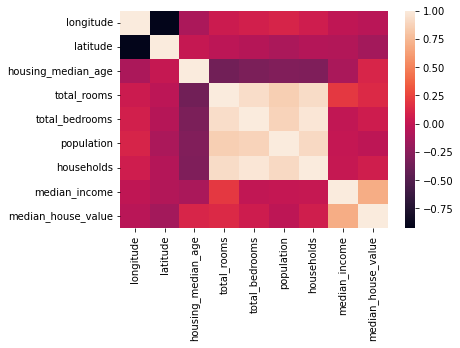

In [13]:
# 3. Посмотрим на корреляцию 
sns.heatmap(df.corr())

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

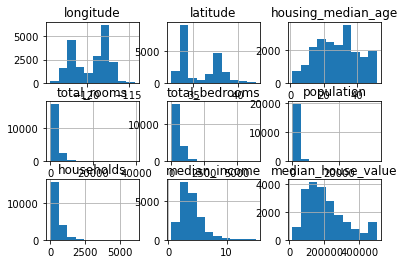

In [357]:
df.hist()

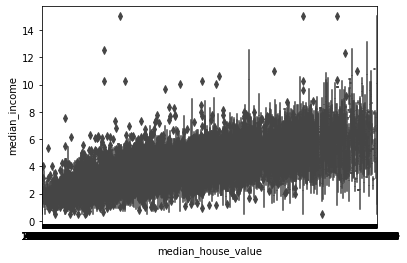

In [358]:
#sns.boxplot(x = 'median_house_value', y = 'median_income', data = df);

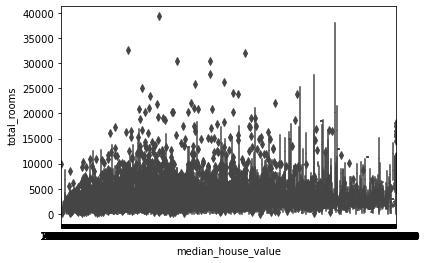

In [251]:
#sns.boxplot(x = 'median_house_value', y = 'total_rooms', data = df);

In [359]:
#5.рассмотрим  ocean_proximity и присвоим через словарь цифрами его составные части
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
df['ocean_proximity'] = df['ocean_proximity'].map({'<1H OCEAN': 0, 'INLAND':1, 'NEAR OCEAN':2,'NEAR BAY':3,'ISLAND':4})

In [15]:
# 4. # Отделение меток: нам теперь надо отделить нашу целевую переменную от всех остальных.
#мы разделяем и формируем новый dataset with library pandas
features = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
 #           'rooms_per_house','bebrooms_per_room','population_per_house_hold']
X = df[features]
#X = df.drop(['median_house_value','longitude','latitude'], axis = 1)
Y = df['median_house_value']

In [16]:
X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [17]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [18]:
# Нужно создать данные для обучения и данные для проверки
from sklearn.model_selection import train_test_split
# импортируем функцию train_test_split и передаем массив независимых переменных : X и массив меток: Y 
# и она по одинаковым индексам разбивает каждый массив на 2:на обучение (X_train,Y_train) и тестирование (X_test,Y_test ),
# Создаем соотнеште в котором нам надо побить все (test_size = 0.2)- в данном случает в тестовое множество попадет 20% всего количества
#  random_state инициализирует генерацию случайных чисел

X_train, X_test, Y_train,  Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
#X_test

In [20]:
#features = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity','rooms_per_house','bebrooms_per_room','population_per_house_hold']
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=15, min_samples_split=2, min_samples_leaf=2, random_state=42)
tree_clf.fit(X_train, Y_train)
from sklearn.tree import export_graphviz

export_graphviz (tree_clf, out_file = 'median_house_value_tree.dot', 
                 feature_names = features, 
                 rounded = True,
                 filled = True)

In [33]:
!dot -Tpng median_house_value_tree.dot -o median_house_value_tree.dot.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0848809 to fit


In [22]:
X_train.shape, Y_train.shape

((16512, 7), (16512,))

In [387]:
#результат улучшается если увеличить параметр глубины ,здесть глубина 3(max_depth=9)
tree_clf.score(X_train,Y_train)

0.5086914741322183

In [397]:
#результат улучшается если увеличить параметр глубины ,здесть глубина 15(max_depth=15),min_samples_split=2, min_samples_leaf=2
tree_clf.score(X_train,Y_train)

0.9179187186530222

In [398]:
tree_clf.score(X_test,Y_test)

0.5055015809225158

# SVM

In [399]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler() 
svm_c = LinearSVC()

X_train = sc.fit_transform(X_train)
svm_c.fit(X_train,Y_train)

In [ ]:
svm_c.score(X_train,Y_train)

In [ ]:
# НЕ РАБОТАЕТ ВЫШЕ 3 СТРОКИ .....

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# в одном списке передаем два кортежа('scaler' и 'svc',где SVC это классификатор- с полимеальным ядром,степень ядра 3 и C)
pipe_svc = Pipeline ([('scaler', StandardScaler() ), 
                     ('svc', SVC(kernel = 'poly', degree = 3, C = 10))])

In [ ]:
pipe_svc.score(X_test,Y_test)

Cross - Validation

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict

In [36]:
clf = DecisionTreeRegressor(max_depth=4, min_samples_split=4, min_samples_leaf=4, random_state = 42)

In [37]:
clf.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                      random_state=42)

In [38]:
clf.score(X_test,Y_test)

0.5726047522799136

In [39]:
#передаем наш классификатор обученный, и наше множество,на котором учим.cv - то сколько разбиений мы хотим делать
# scoring='roc_auc'
score = cross_val_score(clf,X_train,Y_train,cv=5,scoring='roc_auc')

C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

In [40]:
# получили 5 оценок из множества X, Y
score

array([nan, nan, nan, nan, nan])

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [42]:
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)


DecisionTreeRegressor()

In [44]:
#оцениваем точность
tree_pred = tree.predict(X_test)
roc_auc_score(Y_test, tree_pred), accuracy_score(Y_test, tree_pred)

ValueError: multi_class must be in ('ovo', 'ovr')

In [45]:
# поиск для дерева
# формируем словарь
tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

In [46]:
tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose=True, )# scoring='roc_auc'

In [49]:
tree_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1252, in fit
    super().fit(
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [48]:
tree_grid.best_params_

{'max_depth': 8, 'max_features': 7}

In [50]:
tree_grid.best_score_

0.6262693861564113

In [51]:
pred = tree_grid.predict(X_test)

In [52]:
roc_auc_score(Y_test, pred), accuracy_score(Y_test, pred)

ValueError: multi_class must be in ('ovo', 'ovr')